# Agent-Based Model on Cat Behavior

### In our project we decided to create 4 total cats with several different traits ranging from hunger levels to personality traits
### Based on the traits each cat has will determine their interactions with each other, objects in the room, and people who walk in the room

In [2]:
from IPython.display import HTML
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time

To start here is a legend of all potential personality traits and needs our cats may have.

In [4]:
legend= {'Calm' : 'Very relaxed',
         'Clumsy' : 'Will tumble over and bump into things' ,
         'Shy' : 'Takes a while to warm up, might hide away' ,
         'Affectionate' : 'Loves cuddles' ,
         "Playful" : 'Wants to hunt and play' ,
         'Smart' : 'Learns quickly good at tricks' , 
         'Anxious' : 'Hides and paces around' , 
         'Angry' : 'Will hiss, growl, and bite' ,
         'Curious' : 'Adventurous and Engageful ' ,
         'Scared' : 'Will run away' ,
         'Energetic' : 'Will run around and play'} 

Because we want our interactions to be as random and organic as possible we will create a class that will help cat decisions!

In [6]:


class Cat:
    def __init__(self, name, personality, image_path):
        self.name = name
        self.personality = personality
        self.image_path = image_path
        self.activity = 'still'

        # physical needs
        self.sleep = 0
        self.hunger = 0
        self.potty = 0

        # position and motion
        self.x, self.y = random.randint(10, 140), random.randint(10, 140)
        self.speed = 0.5
        self.target = self.random_target()
        self.mood = "😐"

    def random_target(self):
        return (random.randint(10, 140), random.randint(10, 140))

    def update_traits(self):
        self.hunger += 1
        self.potty += 1
        self.sleep += 1

    def eat(self):
        self.hunger = 0
        self.potty += 2
        self.activity = "eat"

    def bed(self):
        self.sleep = max(0, self.sleep - 3)
        self.activity = "sleep"

    def play(self):
        self.hunger += 2
        self.sleep += 2
        self.potty += 1
        self.activity = "play"

    def bathroom(self):
        self.potty = 0
        self.activity = "bathroom"

    def action_choices(self):
        actions = {
            'eat': self.hunger,
            'sleep': self.sleep,
            'bathroom': self.potty,
            'play': self.personality.get('Playful', 1)
        }
        action = max(actions, key=actions.get)
        getattr(self, action)()

        

    def move_towards(self, target_x, target_y):
        dx = target_x - self.x
        dy = target_y - self.y
        dist = (dx**2 + dy**2)**0.5
        if dist > 0:
            self.x += self.speed * dx / dist
            self.y += self.speed * dy / dist
    def move(self):
        dx = self.target[0] - self.x
        dy = self.target[1] - self.y
        dist = (dx**2 + dy**2)**0.5
        if dist > 1:
            self.x += self.speed * dx / dist
            self.y += self.speed * dy / dist
            # Stay inside the plot area
            self.x = min(max(self.x, 0), 150)
            self.y = min(max(self.y, 0), 150)



    def roam(self):
        if self.mood == "😐":  # only roam if not interacting
            self.target = self.random_target()
    

    def distance_to(self, other):
        return ((self.x - other.x) ** 2 + (self.y - other.y) ** 2) ** 0.5

    def interact_with(self, other_cat):
        distance = self.distance_to(other_cat)
    
        if distance < 25:
            shy = self.personality.get("Shy", 0)
            affectionate = self.personality.get("Affectionate", 0)
    
            if shy >= 4:
                self.mood = "🙀"
                # Move away from the other cat
                dx = self.x - other_cat.x
                dy = self.y - other_cat.y
                self.target = (self.x + dx, self.y + dy)
    
            elif affectionate >= 4:
                self.mood = "😻"
                self.target = (other_cat.x, other_cat.y)
    
            else:
                self.mood = "😺"
        else:
            self.mood = "😐"


    def __repr__(self):
        return f'Cat({self.name}), traits: {self.personality}'


In [8]:
cats = [ 
    Cat('Tito', {
        'Playful': 5, 'Affectionate': 4, 'Shy': 5, 'Calm': 2,
        'Curious': 3, 'Smart': 1, 'Hunger': 3, 'Sleep': 3, 'Scared': 4
    }, "tito.png"),

    Cat('Tobi', {
        'Playful': 3, 'Affectionate': 4, 'Shy': 1, 'Calm': 4,
        'Curious': 5, 'Smart': 3, 'Hunger': 3, 'Sleep': 3, 'Scared': 1
    }, "tobi.png"),

    Cat('Dumpling', {
        'Playful': 4, 'Affectionate': 5, 'Shy': 2, 'Calm': 3,
        'Curious': 4, 'Smart': 4, 'Hunger': 2, 'Sleep': 4, 'Scared': 2
    }, "dumpling.png"),

    Cat('Jiji', {
        'Playful': 2, 'Affectionate': 2, 'Shy': 4, 'Calm': 5,
        'Curious': 1, 'Smart': 5, 'Hunger': 4, 'Sleep': 2, 'Scared': 5
    }, "jiji.png")
]
        

Here you can find out who our cats are and what their personality traits are!

The start of the simulation for the visualization.

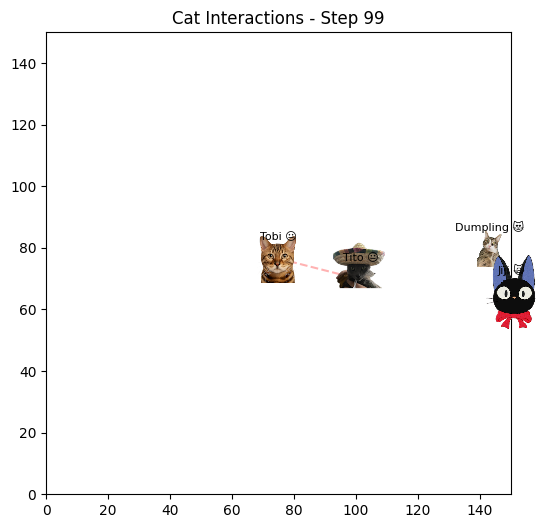

In [10]:

import numpy as np
from PIL import Image
import imageio  # only if you're saving MP4s
frames = []
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

#The lines above are from Chatgpt!
# OpenAI. ChatGPT, 14 Apr. 2024, https://chat.openai.com.
# Prompt chain: { The orignal plotting code + "How do i save the display as a gif/mp4 file?"}

from IPython.display import display, clear_output
def imscatter(x, y, image_path, ax=None, zoom=0.25):
    if ax is None:
        ax = plt.gca()
    image = Image.open(image_path).convert("RGBA")
    image = np.asarray(image)
    im = OffsetImage(image, zoom=zoom)
    ab = AnnotationBbox(im, (x, y), frameon=False)
    ax.add_artist(ab)
    return ab
    
#Visualization
fig, ax = plt.subplots(figsize=(6, 6))
canvas = FigureCanvas(fig)  # attach canvas to the figure. This line is from ChatGPT.

for step in range(100):
    ax.clear()
    ax.set_xlim(0, 150)
    ax.set_ylim(0, 150)
    ax.set_title(f"Cat Interactions - Step {step}")

    for i in range(len(cats)):
        for j in range(i + 1, len(cats)):
            cats[i].interact_with(cats[j])
            cats[j].interact_with(cats[i])  # mutual!
    
    # Now move + roam based on updated moods
    for cat in cats:
        if cat.mood == "😐":
            cat.roam()
        cat.move()

        imscatter(cat.x, cat.y, cat.image_path, ax=ax, zoom=0.25)
        ax.text(cat.x, cat.y + 6, f"{cat.name} {cat.mood}", ha='center', fontsize=8)

    for i in range(len(cats)):
        for j in range(i + 1, len(cats)):
            if cats[i].distance_to(cats[j]) < 30:
                ax.plot([cats[i].x, cats[j].x], [cats[i].y, cats[j].y], 'r--', alpha=0.3)
    plt.draw()
    
    #Following lines are from CHatgpt!
    # Convert canvas to an RGBA image (handles latest versions)
    canvas.draw()  # make sure the figure is drawn
    image = np.array(canvas.buffer_rgba())  # get RGBA data
    image = image[:, :, :3]  # remove alpha channel (if you don't need it)
    frames.append(Image.fromarray(image))



    clear_output(wait=True)
    display(fig)
    time.sleep(0.05)
    
plt.close()

frames[0].save("cat_interactions2.gif", save_all=True, append_images=frames[1:], duration=50, loop=0)



In [ ]:
#Human Class
class Human():
    def __init__(self, name, likeability, image_path):
        self.name = name
        self.likeness = likeability
        self.image_path = image_path

    def pet_cat(self, cat):
        # if cat.personality 
            # if affectionate is above 3, cat gets 1 pet. result is WHAT IS THE RESULT?



    def play_cat(self, cat):
    if cat.playful >= 3:
        #human can play with cat if cat playful is higher than 3
        #result is that WHWAT

    def feed_cat(self,cat):
        #If cat hunger level is below 5, cat will be fed....someone's code allows for the cat to 
        

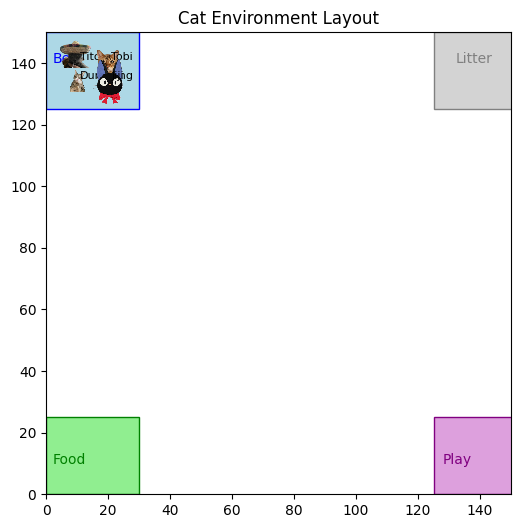

In [12]:
from IPython.display import HTML
import numpy as np  
import numpy.random as rand
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
# To start here is a legend of all potential personality traits and needs our cats may have.

legend= {'Calm' : 'Very relaxed; Gets along with all cats; Gets along with all humans',
         'Shy' : 'Takes a while to warm up, hides away; Does not interact with other cats or humans' ,
         "Playful" : 'Wants to hunt and play; Gets along with Calm cats, Fights with Aggressive cats; Gets along with all humans' ,
         'Aggressive' : 'Will hiss, growl, and bite; Fights with all cats; Fights with humans' 
        }  #
# Trait	Behavior Around Others
# Shy ≥ 2	Avoids other cats — moves away if another cat is nearby
# Aggressive ≥ 2	Approaches other cats — initiates "conflict" when nearby
# Calm ≥ 2	Doesn't react to other cats (neutral)
# Playful ≥ 2	Moves toward cats (seeks interaction), unless the other cat is aggressive
#Because we want our interactions to be as random and organic as possible we will create a class that will help cat decisions!

import random

class Cat:
    def __init__(self, name, personality, image_path):
        self.name = name
        self.image_path = image_path
        self.personality = personality

        self.needs = {'hunger': 0, 'sleep': 0, 'potty': 0}
        self.activity = "roam"

        self.x, self.y = 15, 137  # Start at bed
        self.target = (self.x, self.y)
        self.speed = 1.5

        self.history = []

        # Trackers for new logic
        self.time_roaming = 0
        self.time_playing = 0
        self.last_eaten = -1
        self.last_pottied = -1

    def update_needs(self):
        for need in self.needs:
            self.needs[need] += 1

    def decide_action(self, hour):
        # Sleep at night unless aggressive/playful
        if 22 <= hour or hour < 6:
            if self.personality.get("Aggressive", 0) < 2 and self.personality.get("Playful", 0) < 2:
                self.activity = 'sleeping'
                self.target = (15, 137)
                self.time_roaming = 0
                self.time_playing = 0
                return

        # Force eat if roaming too long without food
        if self.time_roaming >= 3 and self.last_eaten < hour - 3:
            self.do_action("eat")
            return

        # Force sleep after eat + potty + roaming or 2+ plays
        if (self.last_eaten != -1 and self.last_pottied != -1 and
            (self.activity == "roam" or self.time_playing >= 2)):
            self.do_action("sleep")
            self.time_roaming = 0
            self.time_playing = 0
            return

        # Normal priority logic
        priorities = {
            'eat': self.needs['hunger'],
            'sleep': self.needs['sleep'],
            'bathroom': self.needs['potty'],
            'play': self.personality.get('Playful', 0)
        }
        chosen = max(priorities, key=priorities.get)
        self.do_action(chosen)

    def do_action(self, action):
        # Update roaming/playing counters
        if action == "roam":
            self.time_roaming += 1
        else:
            self.time_roaming = 0

        if action == "play":
            self.time_playing += 1
        else:
            self.time_playing = 0

        # Action-specific behaviors
        if action == 'eat':
            self.needs['hunger'] = 0
            self.needs['potty'] += 2
            self.activity = 'eating'
            self.target = (15, 12)
        elif action == 'sleep':
            self.needs['sleep'] = max(0, self.needs['sleep'] - 3)
            self.activity = 'sleeping'
            self.target = (15, 137)
        elif action == 'bathroom':
            self.needs['potty'] = 0
            self.activity = 'bathroom'
            self.target = (140, 137)
        elif action == 'play':
            self.needs['hunger'] += 2
            self.needs['sleep'] += 2
            self.needs['potty'] += 1
            self.activity = 'playing'
            self.target = (140, 12)
        else:
            self.activity = 'roam'
            self.target = self.random_target()

    def move(self):
        dx = self.target[0] - self.x
        dy = self.target[1] - self.y
        dist = (dx**2 + dy**2)**0.5
        if dist > 1:
            self.x += self.speed * dx / dist
            self.y += self.speed * dy / dist
            self.x = min(max(self.x, 0), 150)
            self.y = min(max(self.y, 0), 150)

    def interact_with(self, other_cat):
        if self == other_cat:
            return
        dist = ((self.x - other_cat.x)**2 + (self.y - other_cat.y)**2)**0.5
        if dist < 25:
            if self.personality.get("Shy", 0) >= 2:
                self.activity = "avoiding"
                dx = self.x - other_cat.x
                dy = self.y - other_cat.y
                self.target = (self.x + dx, self.y + dy)
            elif self.personality.get("Aggressive", 0) >= 2:
                self.activity = "confronting"
                self.target = (other_cat.x, other_cat.y)
            elif self.personality.get("Playful", 0) >= 2 and other_cat.personality.get("Aggressive", 0) < 2:
                self.activity = "approaching"
                self.target = (other_cat.x, other_cat.y)

    def log_state(self, hour):
        if self.activity == "eating":
            self.last_eaten = hour
        elif self.activity == "bathroom":
            self.last_pottied = hour

        summary = f"Hour {hour}: {self.name} is {self.activity} at ({int(self.x)}, {int(self.y)})"
        self.history.append({
            'hour': hour,
            'x': self.x,
            'y': self.y,
            'activity': self.activity,
            'needs': self.needs.copy(),
            'summary': summary
        })

    def random_target(self):
        return (random.randint(10, 140), random.randint(10, 140))

    def __repr__(self):
        return f"Cat({self.name}, activity={self.activity})"
cats = [
    Cat('Tito', {
        'Playful': 2,
        'Shy': 1,
        'Calm': 1,
        'Aggressive': 1
    }, "tito.png"),

    Cat('Tobi', {
        'Playful': 1,
        'Shy': 2,
        'Calm': 1,
        'Aggressive': 1
    }, "tobi.png"),

    Cat('Dumpling', {
        'Playful': 1,
        'Shy': 1,
        'Calm': 2,
        'Aggressive': 1
    }, "dumpling.png"),

    Cat('Jiji', {
        'Playful': 1,
        'Shy': 1,
        'Calm': 1,
        'Aggressive': 2
    }, "jiji.png")
]
# Here you can find out who our cats are and what their personality traits are!

# The start of the simulation for the visualization.

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# 📦 Cache loaded images
cat_images = {}

# 📸 Load image with optional zoom
def get_cat_image(path, zoom=0.15):
    if path not in cat_images:
        cat_images[path] = OffsetImage(mpimg.imread(path), zoom=zoom)
    return cat_images[path]

# 🛏️ Draw environment layout
def draw_environment(ax):
    ax.set_xlim(0, 150)
    ax.set_ylim(0, 150)
    ax.set_title("Cat Environment Layout")

    # Add zones
    ax.add_patch(patches.Rectangle((0, 125), 30, 25, edgecolor='blue', facecolor='lightblue'))
    ax.text(2, 140, "Bed", fontsize=10, color='blue')

    ax.add_patch(patches.Rectangle((125, 125), 30, 25, edgecolor='gray', facecolor='lightgray'))
    ax.text(132, 140, "Litter", fontsize=10, color='gray')

    ax.add_patch(patches.Rectangle((0, 0), 30, 25, edgecolor='green', facecolor='lightgreen'))
    ax.text(2, 10, "Food", fontsize=10, color='green')

    ax.add_patch(patches.Rectangle((125, 0), 30, 25, edgecolor='purple', facecolor='plum'))
    ax.text(128, 10, "Play", fontsize=10, color='purple')

# 🐱 Add cats to the plot (static or initial state)
def add_cats_to_plot(ax, cat_data, bed_center=(15, 137), zoom=0.15):
    offsets = [(-5, 3), (5, 3), (-5, -3), (5, -3)]  # prevent overlap
    for (name, img_file), (dx, dy) in zip(cat_data, offsets):
        img = get_cat_image(img_file, zoom)
        ab = AnnotationBbox(img, (bed_center[0] + dx, bed_center[1] + dy), frameon=False)
        ax.add_artist(ab)
        ax.text(bed_center[0] + dx + 1, bed_center[1] + dy + 1, name, fontsize=8)
def update(hour):
    ax.clear()
    draw_environment(ax)
    ax.set_title(f"Hour {hour}")

    for cat in cats:
        cat.decide_action(hour)
        cat.move()
        cat.log_state()
    for cat in cats:
        img = get_cat_image(cat.image_path)
        ab = AnnotationBbox(img, (cat.x, cat.y), frameon=False)
        ax.add_artist(ab)
        ax.text(cat.x + 1, cat.y + 1, cat.name, fontsize=8)

    # hour_data = log_df[log_df['hour'] == hour]
    # for _, row in hour_data.iterrows():
    #     img = get_cat_image(row['name'].lower() + ".png")
    #     ab = AnnotationBbox(img, (row['x'], row['y']), frameon=False)
    #     ax.add_artist(ab)
    #     ax.text(row['x'] + 1, row['y'] + 1, row['name'], fontsize=8)
cat_data = [
    ("Tito", "tito.png"),
    ("Tobi", "tobi.png"),
    ("Dumpling", "dumpling.png"),
    ("Jiji", "jiji.png")
]

fig, ax = plt.subplots(figsize=(6, 6))
draw_environment(ax)
add_cats_to_plot(ax, cat_data)
ani = animation.FuncAnimation(fig, update, frames=range(0, 24), interval=1000, repeat=False)
plt.show()